Anggota :
- Alviatul Nazila
- Clarissa Sanindita Reikisyifa
- Paizal Merdijaya

# Pengenalan

## Latar Belakang

Pada era digital saat ini, layanan transportasi berbasis aplikasi telah menjadi bagian integral dari kehidupan sehari-hari banyak orang. Layanan seperti Lyft, Uber, dan lainnya memungkinkan konsumen untuk memesan tumpangan dengan mudah melalui ponsel mereka, menawarkan kenyamanan dan efisiensi yang tak tertandingi oleh moda transportasi tradisional.

Salah satu aspek paling menarik dari layanan ini adalah penentuan harga. Banyak dari platform ini memanfaatkan algoritma harga dinamis yang menyesuaikan biaya tumpangan berdasarkan berbagai faktor, seperti permintaan, waktu, cuaca, dan banyak lagi. Untuk perusahaan transportasi, pemahaman mendalam tentang dinamika harga ini adalah kunci untuk meningkatkan pendapatan dan efisiensi operasional.

Dalam konteks ini, kami memilih untuk menganalisis dataset yang berkaitan dengan perjalanan yang dipesan melalui layanan Lyft di kota tertentu. Analisis data ini dapat memberikan wawasan berharga tentang bagaimana faktor-faktor tertentu mempengaruhi harga, serta bagaimana perusahaan bisa mengoptimalkan strategi penentuan harga mereka.

## Deskripsi Data

Dataset yang digunakan dalam penelitian ini berisi informasi tentang perjalanan yang dipesan melalui layanan Lyft. Spesifikasi data sebagai berikut:

Jumlah Data: 6 entri (sampel)
- Kelas: Terdiri dari berbagai jenis layanan Lyft seperti 'Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', dan 'Lux Black'.

- Sumber Data: Data ini diambil dari kaggle

- Link Data : https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma


Beberapa kolom penting dalam dataset ini meliputi:
- timestamp, hour, day, month, datetime: informasi waktu pemesanan.
source, destination: lokasi awal dan tujuan perjalanan.

- cab_type, product_id, name: informasi tentang jenis layanan Lyft.
price: harga tumpangan.
distance: jarak perjalanan

-surge_multiplier: pengali tarif yang digunakan saat permintaan tinggi.
temperature, apparentTemperature, humidity, windSpeed, dll.: data cuaca pada saat pemesanan.

## Tujuan Penelitian

Tujuan dari penelitian ini adalah:

- Memahami dinamika penentuan harga dalam layanan transportasi berbasis aplikasi seperti Lyft.

- Menganalisis bagaimana berbagai faktor, terutama kondisi cuaca, mempengaruhi harga tumpangan.

- Memberikan rekomendasi kepada perusahaan transportasi tentang bagaimana mengoptimalkan strategi penentuan harga mereka berdasarkan analisis data.

Dengan memahami hubungan antara faktor-faktor ini dan harga, kita dapat memberikan wawasan berharga yang dapat membantu perusahaan transportasi dalam mengambil keputusan bisnis yang lebih tepat dan efisien

# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from io import StringIO
from plotnine import ggplot, aes, geom_point
from sklearn import linear_model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

# Load Data

In [2]:
df = pd.read_csv('rideshare_kaggle.csv')

In [3]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [4]:
# untuk menampilkan data agar lengkap jadi tidak ada ....
pd.set_option('display.max_columns', 500)

In [5]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


# Data Cleaning

In [6]:
# Berfungsi/berguna untuk mendapatkan dimensi atau ukuran dari DataFrame
df.shape

(693071, 57)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [8]:
# Dalam kasus ini kita akan menggunakan copy dari DataFrame aslinya dengan perintah ini
df_clean = df.copy()

In [9]:
# Untuk melihat apakah ada nilai null tiap kolomnya
df_clean.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [10]:
# persentase nilai NaN dalam setiap baris
nan_percentage = df_clean.isnull().mean(axis=1) * 100

In [11]:
# Mengatur threshold
threshold_percentage = 10

In [12]:
# Menghapus baris yang mengandung NaN
df_clean = df.dropna()

Setelah kita menentukan threshold 10% maka kita bisa mengdrop data yang null karena banyak data yang null hanya kurang lebih 8% 

In [13]:
# Untuk melihat apakah ada nilai null tiap kolomnya
df_clean.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [14]:
# Melihat isi kolom 'price'
price_column = df_clean['price']
print(price_column)

0          5.0
1         11.0
2          7.0
3         26.0
4          9.0
          ... 
693065     9.5
693066    13.0
693067     9.5
693069    27.0
693070    10.0
Name: price, Length: 637976, dtype: float64


Jadi saat ini sudah tidak ada nilai yang Nan di kolom price

In [15]:
df_clean.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [16]:
# Melihat apakah ada data yang duplikat
print("Duplicated data :", df_clean.duplicated().sum())

Duplicated data : 0


# Exploration Data

In [17]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

Dengan data statistik yang Anda berikan, kita dapat menyimpulkan informasi berikut:

- Jumlah Data: Ada sekitar 693,071 entri dalam dataset.

- Timestamp: Rentang waktu data mencakup sekitar 1.543204×1091.543204×109 hingga 1.545161×1091.545161×109, yang menggambarkan timestamp dalam format Unix

- Hour, Day, Month: Waktu pemesanan berkisar dari jam 0 hingga 23. Tanggal pemesanan mencakup tanggal 1 hingga 30. Data berasal dari bulan 11 dan 12.

- Price (Harga): Harga rata-rata perjalanan adalah $16.55, harga berkisar dari $2.50 hingga $97.50.

- Distance (Jarak): Jarak rata-rata perjalanan adalah sekitar 2.19 mil. Jarak perjalanan berkisar dari 0.02

- dsb

In [18]:
# Membuat plot corr dari df_clean
def plot_corr(df_clean, size=11):
    corr = df_clean.corr()
    fiq, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13180\3109774670.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


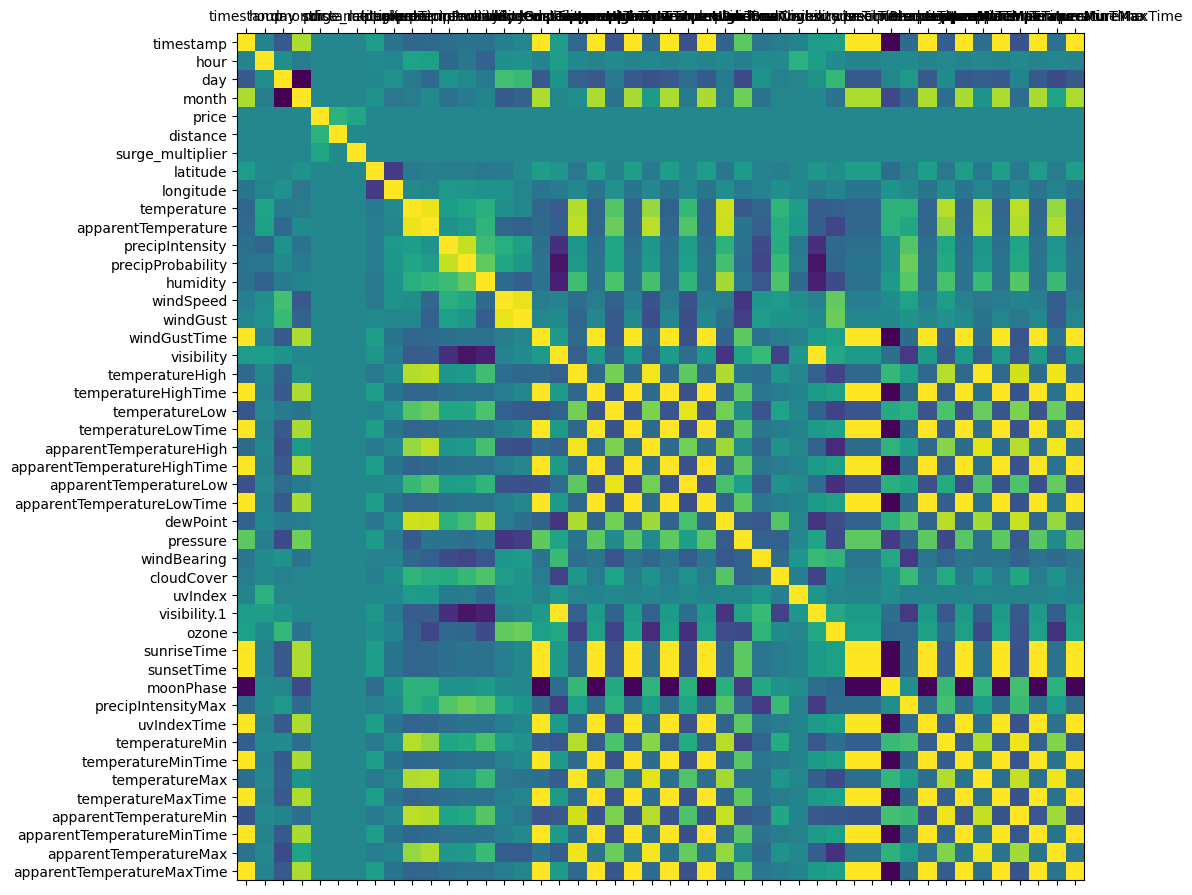

In [19]:
# Menampilkan plot_corr yang telah dibuat
plot_corr(df_clean)

Dapat dilihat bahwa data ini yang berwarna kuning memiliki korelasi yang cukup dekat karena banyak data,jadi warnanya ini sdikit terlihat berantakan,walau demikian data ini tidak ada duplikat jadi karena datanya memiliki nilai yang saling berdekatan.

In [20]:
# Melihat nilainya
df_clean.corr()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13180\860382722.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
timestamp,1.000000,-0.028501,-0.341420,0.771245,0.000808,0.003290,0.000611,0.168295,-0.136716,-0.249027,-0.226472,-0.179834,-0.147351,-0.167740,-0.066364,0.005565,0.998843,0.158577,-0.228324,0.999332,-0.366885,0.999175,-0.215550,0.999312,-0.402043,0.999204,-0.265512,0.533074,-0.133853,-0.081522,-0.025986,0.158577,0.196566,0.999372,0.999372,-0.846279,-0.211887,0.999364,-0.307194,0.998195,-0.186495,0.999290,-0.378538,0.998288,-0.157891,0.999276
hour,-0.028501,1.000000,0.066223,-0.079734,0.000561,0.002283,-0.000067,0.019228,-0.005986,0.218829,0.198212,-0.233246,-0.129631,-0.275778,0.073011,0.077646,-0.028544,0.173776,0.005191,-0.028323,0.015000,-0.027267,0.005518,-0.028481,0.015722,-0.027438,0.004863,-0.067787,0.036292,0.026680,0.330326,0.173776,0.034035,-0.028016,-0.028014,0.020997,0.020288,-0.027997,0.015668,-0.027486,0.002982,-0.028479,0.015882,-0.028172,0.002904,-0.028273
day,-0.341420,0.066223,1.000000,-0.861325,-0.000722,-0.000992,0.001397,0.006744,0.078539,-0.083934,-0.223410,0.091513,0.030765,-0.093376,0.440512,0.402611,-0.336560,0.105210,-0.283410,-0.343251,-0.088370,-0.333686,-0.398099,-0.343422,-0.192984,-0.335630,-0.101470,-0.444738,0.092226,-0.041103,-0.012083,0.105210,0.376791,-0.341201,-0.341145,-0.007038,0.145789,-0.341330,0.038089,-0.334118,-0.304704,-0.344669,-0.019878,-0.335176,-0.444366,-0.344546
month,0.771245,-0.079734,-0.861325,1.000000,0.000913,0.002402,-0.000612,0.085946,-0.126763,-0.082048,0.024773,-0.154356,-0.097803,-0.022078,-0.334897,-0.270541,0.767339,0.011129,0.068094,0.772119,-0.138703,0.765551,0.152479,0.772227,-0.087019,0.766883,-0.074906,0.589683,-0.135317,-0.016767,-0.012340,0.011129,-0.149111,0.770749,0.770712,-0.452655,-0.213301,0.770832,-0.191928,0.765319,0.105113,0.773057,-0.191293,0.766097,0.214928,0.772962
price,0.000808,0.000561,-0.000722,0.000913,1.000000,0.345061,0.240458,0.002088,-0.001417,-0.000084,-0.000193,0.000166,-0.000243,-0.001238,0.000990,0.001218,0.000851,0.001497,-0.000516,0.000759,0.000182,0.000754,-0.000261,0.000741,0.000831,0.000761,-0.000615,0.000866,-0.001382,0.000883,-0.000424,0.001497,0.000460,0.000760,0.000760,-0.001602,0.001114,0.000763,-0.000428,0.000769,-0.000550,0.000766,-0.000580,0.000814,-0.000290,0.000746
distance,0.003290,0.002283,-0.000992,0.002402,0.345061,1.000000,0.025946,0.000984,-0.000415,-0.002738,-0.002835,-0.000512,0.000134,-0.003849,0.001709,0.000920,0.003371,0.004143,-0.003795,0.003338,-0.001744,0.003282,-0.003699,0.003317,-0.001006,0.003311,-0.003920,0.003565,-0.002638,-0.000958,0.002422,0.004143,0.001206,0.003291,0.003291,-0.004301,0.000670,0.003298,-0.003192,0.003166,-0.003875,0.003318,-0.003649,0.003266,-0.003889,0.003319
surge_multiplier,0.000611,-0.000067,0.001397,-0.000612,0.240458,0.025946,1.000000,0.001471,-0.001961,-0.001594,-0.002586,-0.001522,-0.002825,-0.001677,0.002593,0.002162,0.000477,0.001716,-0.001943,0.000560,-0.002669,0.000614,-0.002098,0.000559,-0.003088,0.000592,-0.001860,-0.003109,0.002171,-0.002101,-0.002567,0.001716,0.003456,0.000585,0.000585,-0.000163,-0.000090,0.000585,-0.000716,0.000594,-0.001998,0.000563,-0.001317,0.000502,-0.002214,0.000559
latitude,0.168295,0.019228,0.006744,0.085946,0.002088,0.000984,0.001471,1.000000,-0.531443,-0.098909,-0.067427,-0.074306,-0.071331,-0.117721,-0.097125,0.024346,0.172786,0.124286,-0.115623,0.173857,-0.032005,0.171345,-0.092459,0

Ini adalah hasil lengkap yang menjelaskan isi korelasinya antar data

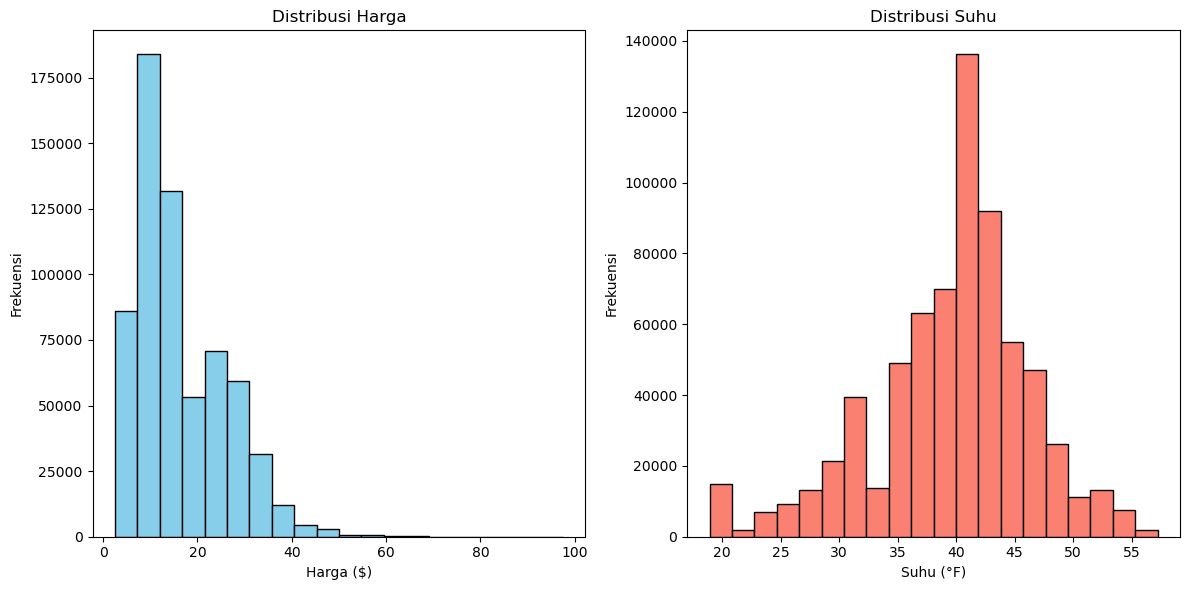

In [21]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df["price"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribusi Harga")
plt.xlabel("Harga ($)")
plt.ylabel("Frekuensi")

plt.subplot(1, 2, 2)
plt.hist(df["temperature"], bins=20, color="salmon", edgecolor="black")
plt.title("Distribusi Suhu")
plt.xlabel("Suhu (°F)")
plt.ylabel("Frekuensi")

plt.tight_layout()
plt.show()

1. Distribusi Harga:
   - Mayoritas harga tampaknya berkumpul di kisaran yang lebih rendah, menunjukkan bahwa banyak tumpangan memiliki biaya yang relatif lebih rendah
   - Ada beberapa puncak atau modus pada distribusi, menunjukkan beberapa titik harga yang paling umum ada pada rentang harga 20$

2. Distribusi Suhu:
   - Suhu tampaknya memiliki distribusi yang lebih merata daripada harga.
   - Ada beberapa kisaran suhu di mana frekuensinya sedikit lebih tinggi, menunjukkan bahwa beberapa suhu lebih umum selama periode waktu yang dianalisis pada rentang 40°F - 45°F.

In [22]:
grouped = df.groupby("name")["price"].mean().sort_values(ascending=False)
grouped

name
Lux Black XL    32.324086
Black SUV       30.286763
Lux Black       23.062468
Black           20.523786
Lux             17.771240
UberXL          15.678144
Lyft XL         15.309363
UberX            9.765074
WAV              9.765019
Lyft             9.610885
UberPool         8.752500
Shared           6.029893
Taxi                  NaN
Name: price, dtype: float64

Dapat dilihat bahwa "Lux Black XL" memiliki harga rata-rata tertinggi, sedangkan "Shared" memiliki harga rata-rata terendah.

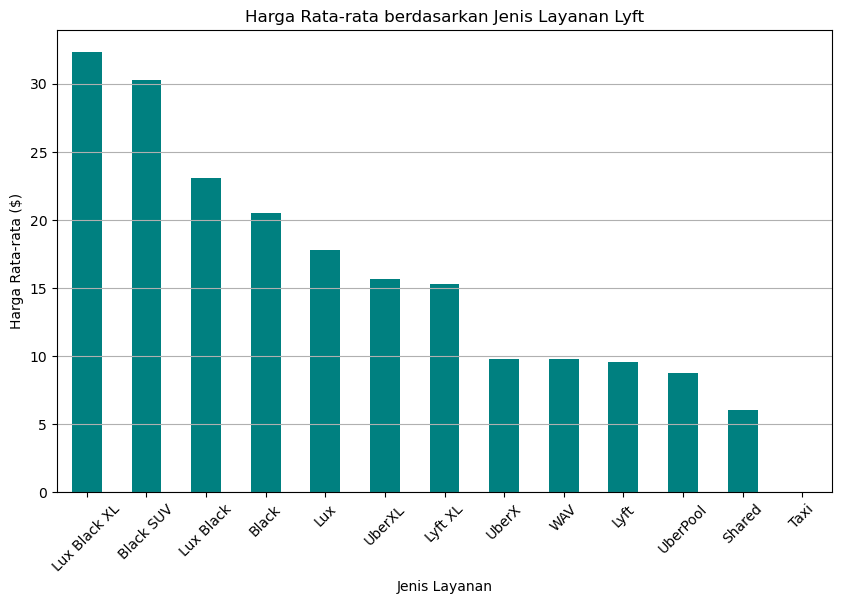

In [23]:
plt.figure(figsize=(10, 6))
grouped.plot(kind="bar", color="teal")
plt.title("Harga Rata-rata berdasarkan Jenis Layanan Lyft")
plt.xlabel("Jenis Layanan")
plt.ylabel("Harga Rata-rata ($)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Dari visualisasi di atas, kita dapat dengan jelas melihat perbedaan harga rata-rata berdasarkan jenis layanan Lyft:
- Layanan premium seperti Lux Black XL dan Black SUV memiliki harga rata-rata yang jauh lebih tinggi dibandingkan dengan layanan lainnya.
- Sebagai layanan bersama, Shared memiliki harga rata-rata terendah, yang sesuai dengan ekspektasi karena layanan tersebut memungkinkan penumpang untuk membagi biaya tumpangan dengan orang lain.

# Data Preprocessing

In [24]:
# proses menentukan data
x = df_clean[['distance', 'hour', 'day', 'month']]
y = df_clean['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Pendefisian Model

In [25]:
# Inisialisasi model
model = LinearRegression()
# Melatih model pada data pelatihan
model.fit(x_train, y_train)
#model = LinearRegression()

LinearRegression()

# Pelatihan Model

In [26]:
# Bagi dataset menjadi data pelatihan dan data pengujian
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# Menguji model pada data pengujian
y_pred = model.predict(x_test)

# Evaluasi Model

In [27]:
# Membuat prediksi menggunakan model yang dilatih
predictions = model.predict(x_test)

# Menghitung kesalahan metrik
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Menampilkan hasil
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Absolute Error: 7.082237459803418
Mean Squared Error: 75.95235840252822
R^2 Score: 0.11680172566040892


jadi didapati hasil Mean Absolute Error sebesar 7.082237459803418, Mean Squared Error sebesar 75.95235840252822,R^2 Score sebesar 0.11680172566040892.

In [28]:
# Menghitung skor (koefisien determinasi R^2) menggunakan set pelatihan
train_score = model.score(x_train, y_train)
print("Train score:", train_score)

Train score: 0.1196151372292592


Hasil Train score sebesar 0.1196151372292592.

## Membuat Plot 

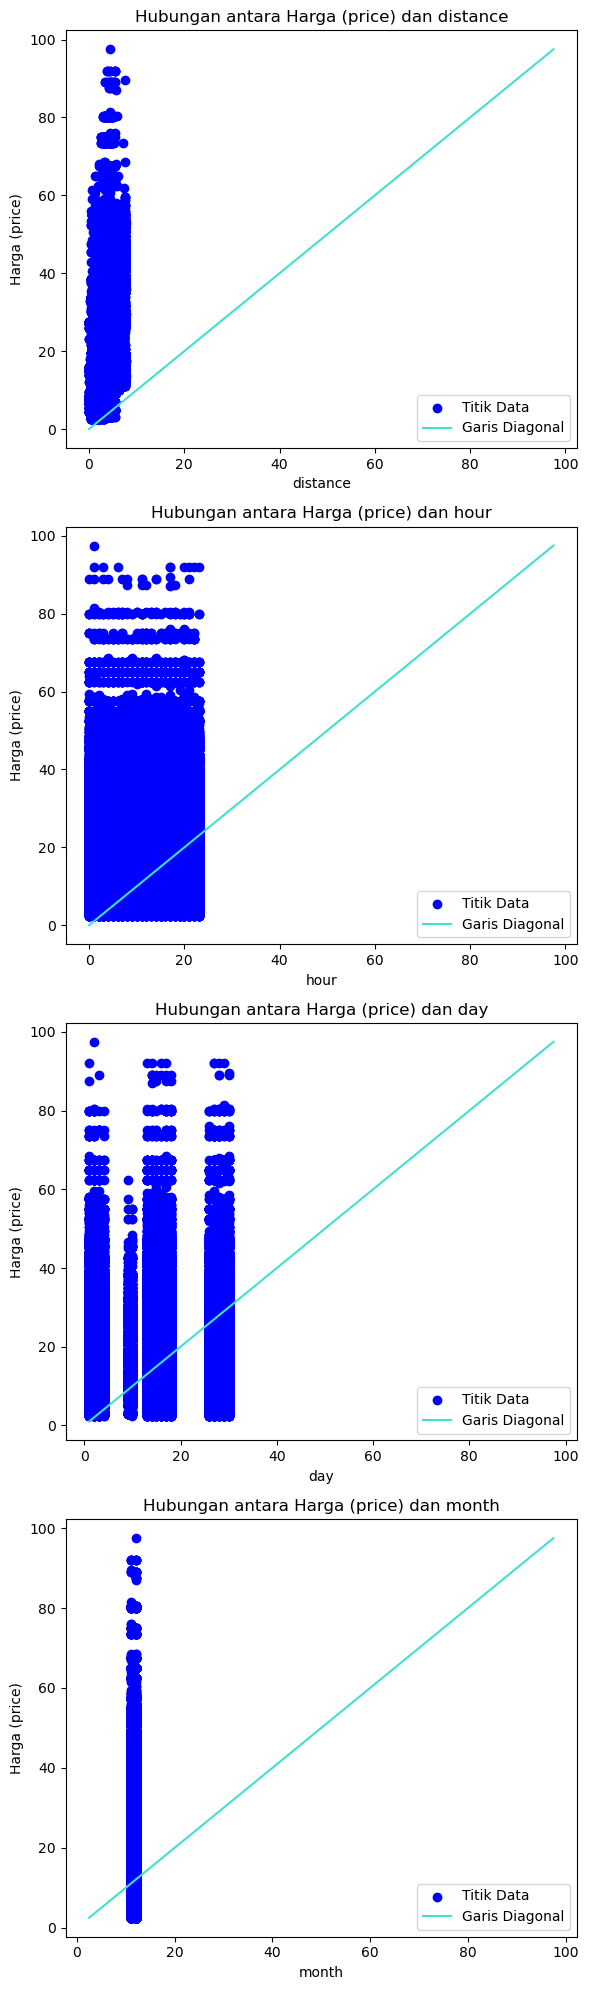

In [29]:
# Kolom yang akan diplot
predicted_columns = ['distance', 'hour', 'day', 'month']
actual_column = 'price'

fig, axes = plt.subplots(len(predicted_columns), figsize=(6, len(predicted_columns)*5))

for i, (ax, column) in enumerate(zip(axes, predicted_columns)):
    # Membuat scatter plot
    ax.scatter(df_clean[column], df_clean[actual_column], color='blue', label='Titik Data')

    # Menambahkan garis diagonal jika perlu
    min_value = min(df_clean[column].min(), df_clean[actual_column].min())
    max_value = max(df_clean[column].max(), df_clean[actual_column].max())
    ax.plot([min_value, max_value], [min_value, max_value], color='turquoise', label='Garis Diagonal')

    # Menambahkan label
    ax.set_title(f"Hubungan antara Harga (price) dan {column}")
    ax.set_ylabel("Harga (price)")
    ax.set_xlabel(f"{column}")

    # Menambahkan legenda
    ax.legend()

plt.tight_layout()
plt.show()

# Menggunakan GridSearchCV pada model LinearRegression

In [30]:
params = {
    'fit_intercept': [True, False],
    'n_jobs': [1, 2, 3],
    'copy_X': [True, False],
    'positive': [True, False],
}

grid_search = GridSearchCV(LinearRegression(), params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print("Best Params: ", best_params)

# Model regresi linier dengan parameter terbaik
lm_best = grid_search.best_estimator_

Best Params:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': True}


Hasil Menggunakan GridSearchCV pada model LinearRegression 'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': True.

In [31]:
y_pred = lm_best.predict(x_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Absolute Error: 7.082236678493772
Mean Squared Error: 75.95197111926815
R-squared: 0.11680622911381267


Menggunakan GridSearchCV  pada model LinearRegression memiliki hasil Mean Absolute Error sebesar 7.082236678493772,Mean Squared Error sebesar 75.95197111926815,
R-squared sebesar  0.11680622911381267 memiliki hasil yang sama dengan menggunakan model LinearRegression tanpa GridSearchCV.

# Membuat Model baru LinearRegression  

In [32]:
# Membuat objek model Regresi Linier
rfr = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, positive=True)

# Melatih (fit) model dengan data pelatihan
rfr.fit(x_train, y_train)

LinearRegression(n_jobs=1, positive=True)

### Simpan model pickle

In [33]:
file_regresi = "model_regresi.pkl"
with open(file_regresi, 'wb') as file:
    pickle.dump(model, file)

# Membuat Model baru untuk pembanding

# Data Preprocessing dan Pendefisian Model

In [34]:
# Membagi data menjadi data pelatihan dan data pengujian
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Buat objek model GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)

# Pelatihan Model 

In [35]:
# Melatih model pada training data
gbr.fit(x_train, y_train)

# Melakukan prediksi pada data pengujian
y_pred = gbr.predict(x_test)

# Evaluasi Model

In [36]:
# Menilai kinerja model
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Absolute Error: 7.074568123621057
Mean Squared Error: 76.1845867066698
R-squared: 0.1267009072921078


Jadi hasil Mean Absolute Error sebesar 7.074568123621057, Mean Squared Error sebesar 76.1845867066698, R-squared sebesar 0.1267009072921078.

# Menggunakan GridSearchCV pada GradientBoostingRegressor

In [37]:
parameters = {
    'learning_rate': [0.01, 0.04],
    'subsample': [0.9, 0.1],
    'n_estimators': [100, 1500],
    'max_depth': [4, 10]
}

randomized_search = RandomizedSearchCV(gbr, parameters, n_iter=5, cv=5,
                                       scoring='neg_mean_squared_error', n_jobs=-1,
                                       random_state=42)

# Bagi data menjadi sampel pelatihan
sample_size = int(len(x_train) * 0.1)
x_train_sample = x_train.sample(sample_size)
y_train_sample = y_train.sample(sample_size)

# Menjalankan RandomizedSearchCV pada sampel pelatihan
randomized_search.fit(x_train_sample, y_train_sample)

# Dapatkan parameter terbaik
best_params = randomized_search.best_params_
print("Best Params: ", best_params)

# Model GradientBoostingRegressor dengan parameter terbaik
gbm_best = randomized_search.best_estimator_

Best Params:  {'subsample': 0.1, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.01}


Hasil Menggunakan GridSearchCV pada GradientBoostingRegressor Best Params:  {'subsample': 0.9, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.01}

In [38]:
# Membuat prediksi menggunakan model gbm_best
y_pred = gbm_best.predict(x_test)

# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Menghitung Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Menghitung R-squared (R2)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Mean Absolute Error (MAE): ", mae)
print("Mean Squared Error (MSE): ", mse)
print("R-squared (R2): ", r2)

Mean Absolute Error (MAE):  7.551923990614347
Mean Squared Error (MSE):  86.95642348110503
R-squared (R2):  0.0032240245188075445


Menggunakan GridSearchCV pada model GradientBoostingRegressor Mean Absolute Error (MAE) sebesar 7.550029621214353, Mean Squared Error (MSE) sebesar 87.13249287474495, R-squared (R2)sebesar 0.0012057522098509743 memiliki perbedaan dari hasil hanya menggunakan model GradientBoostingRegressor tanpa  GridSearchCV.


# Membuat Model baru GradientBoostingRegressor

In [39]:
# Membuat objek model GradientBoostingRegressor
gbr = GradientBoostingRegressor( subsample =  0.9, n_estimators = 100, max_depth = 4, learning_rate = 0.04)

# Melatih (fit) model dengan data pelatihan
gbr.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.04, max_depth=4, subsample=0.9)

### Simpan model pickle

In [40]:
file_gradient_boosting = "gbr_gradient_boosting.pkl"
with open(file_gradient_boosting, 'wb') as file:
    pickle.dump(model, file)

# Kesimpulan 

Setelah meneliti fenomena layanan transportasi berbasis aplikasi, kami berhasil mengumpulkan informasi dan wawasan penting tentang bagaimana perusahaan seperti Lyft menyesuaikan harga tumpangan mereka dengan berbagai faktor. Dalam penelitian ini, kami menganalisis dataset yang berkaitan dengan perjalanan yang dipesan melalui layanan Lyft di kota tertentu. Melalui analisis ini, kami mencari pemahaman yang lebih baik tentang bagaimana perusahaan transportasi dapat mengoptimalkan strategi penetapan harga mereka.

Setelah mengamati data, kami menemukan bahwa jenis layanan yang ditawarkan memiliki dampak signifikan pada harga tumpangan. Layanan premium, seperti Lux Black XL dan Black SUV, memiliki harga rata-rata yang jauh lebih tinggi dibandingkan dengan layanan lain. Di sisi lain, layanan bersama (Shared) memiliki harga rata-rata yang lebih rendah, menjadikannya pilihan yang lebih ekonomis bagi penumpang yang mencari biaya tumpangan yang lebih murah. Selain itu, faktor-faktor seperti kondisi cuaca dan waktu juga mempengaruhi harga; misalnya, dalam kondisi cuaca yang dingin, tarif tumpangan cenderung lebih sering berkisar di angka 20$.

Untuk memahami lebih dalam hubungan antara faktor-faktor ini dan dinamika penentuan harga, kami mencoba beberapa model regresi. Model LinearRegression, baik dengan atau tanpa GridSearchCV, memberikan hasil yang hampir sama, seperti halnya model GradientBoostingRegressor dengan GridSearchCV. Dari hasil ini, kami menyimpulkan bahwa penggunaan model regresi dalam analisis ini dapat membantu perusahaan dalam mengambil keputusan bisnis yang lebih efisien.

Berdasarkan hasil penelitian ini, kami merekomendasikan agar perusahaan transportasi lebih proaktif dalam mengadaptasi strategi penetapan harga mereka berdasarkan faktor seperti jenis layanan, permintaan, cuaca, dan waktu, untuk meningkatkan pendapatan dan efisiensi operasional mereka. Namun, perlu dicatat bahwa hasil dari penelitian ini mungkin lebih relevan untuk perusahaan yang beroperasi di kawasan yang sama dengan dataset dan mungkin berbeda jika diterapkan pada lokasi yang berbeda.